In [1]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_excel(r'dataset.xlsx')
df.head()

,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,technopreneurship?,multimedia?,seni dalam multimedia?,tujuan karir?,analitis sistematis?,memimpin?,berpikir kreatif?
0,teknik informatika,ya,pendidikan,staf,5,3,4,3,4,tidak,3,3,swasta,3,3,3
1,teknik informatika,ya,pendidikan,pendidik,2,4,4,4,4,tidak,4,4,dosen,4,3,4
2,teknik informatika,ya,pendidikan,direktur/kepala/manager,3,4,2,4,3,tidak,3,2,dosen,4,4,4
3,teknik informatika,ya,teknologi informasi,staf,8,5,1,1,2,ya,5,5,swasta,4,3,5
4,sistem informasi,ya,pendidikan,staf,5,4,4,4,4,ya,4,4,dosen,4,3,4


In [3]:
# prompt: klasifikasi kolom lama bekerja pada df ke dalam beberapa kelompok nilai: 0-2, 2-5, 5-10, 10-15, >15

def categorize_work_experience(experience):
    if 0 <= experience < 2:
        return '0-2'
    elif 2 <= experience < 5:
        return '2-5'
    elif 5 <= experience < 10:
        return '5-10'
    elif 10 <= experience < 15:
        return '10-15'
    elif experience >= 15:
        return '>15'
    else:
        return 'Unknown'  # Handle cases with negative or invalid values

df['kategori lama bekerja'] = df['lama bekerja?'].apply(categorize_work_experience)
df

,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,technopreneurship?,multimedia?,seni dalam multimedia?,tujuan karir?,analitis sistematis?,memimpin?,berpikir kreatif?,kategori lama bekerja
0,teknik informatika,ya,pendidikan,staf,5,3,4,3,4,tidak,3,3,swasta,3,3,3,5-10
1,teknik informatika,ya,pendidikan,pendidik,2,4,4,4,4,tidak,4,4,dosen,4,3,4,2-5
2,teknik informatika,ya,pendidikan,direktur/kepala/manager,3,4,2,4,3,tidak,3,2,dosen,4,4,4,2-5
3,teknik informatika,ya,teknologi informasi,staf,8,5,1,1,2,ya,5,5,swasta,4,3,5,5-10
4,sistem informasi,ya,pendidikan,staf,5,4,4,4,4,ya,4,4,dosen,4,3,4,5-10
5,pendidikan matematika,ya,pendidikan,pendidik,4,4,3,3,3,ya,2,2,dosen,3,3,3,2-5
6,teknik informatika,ya,teknologi informasi,direktur/kepala/manager,5,4,4,4,3,tidak,2,2,dosen,4,2,4,5-10
7,teknologi informasi,ya,teknologi informasi,staf,15,5,3,3,2,tidak,1,1,swasta,5,4,4,>15
8,pendidikan teknik informatika,ya,swasta,staf,5,4,4,4,4,tidak,4,4,swasta,4,4,4,5-10
9,sistem informasi,ya,teknologi informasi,staf,2,3,3,3,3,tidak,3,3,dosen,4,4,4,2-5


In [4]:
df.head()

,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,technopreneurship?,multimedia?,seni dalam multimedia?,tujuan karir?,analitis sistematis?,memimpin?,berpikir kreatif?,kategori lama bekerja
0,teknik informatika,ya,pendidikan,staf,5,3,4,3,4,tidak,3,3,swasta,3,3,3,5-10
1,teknik informatika,ya,pendidikan,pendidik,2,4,4,4,4,tidak,4,4,dosen,4,3,4,2-5
2,teknik informatika,ya,pendidikan,direktur/kepala/manager,3,4,2,4,3,tidak,3,2,dosen,4,4,4,2-5
3,teknik informatika,ya,teknologi informasi,staf,8,5,1,1,2,ya,5,5,swasta,4,3,5,5-10
4,sistem informasi,ya,pendidikan,staf,5,4,4,4,4,ya,4,4,dosen,4,3,4,5-10


In [5]:
df.tail()

,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,technopreneurship?,multimedia?,seni dalam multimedia?,tujuan karir?,analitis sistematis?,memimpin?,berpikir kreatif?,kategori lama bekerja
50,komunikasi dan penyiaran islam,ya,swasta,staf,3,3,2,2,2,ya,3,2,dosen,3,4,3,2-5
51,teknik informatika,ya,teknologi informasi,staf,4,4,4,4,3,tidak,2,2,dosen,4,4,4,2-5
52,teknik informatika,ya,pendidikan,staf,15,4,3,3,3,tidak,3,3,dosen,3,3,3,>15
53,teknik informatika,ya,teknologi informasi,direktur/kepala/manager,10,5,3,3,5,ya,2,2,swasta,5,5,4,10-15
54,sistem informasi,ya,teknologi informasi,staf,15,4,3,4,4,tidak,4,3,swasta,4,4,4,>15


In [6]:
from sklearn.preprocessing import LabelEncoder

dfpake = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

encoder = LabelEncoder()
dfpake['jurusan_encode'] = encoder.fit_transform(df['jurusan'])
dfpake['bekerja_encode'] = encoder.fit_transform(df['bekerja?'])
dfpake['bidang_encode'] = encoder.fit_transform(df['bidang?'])
dfpake['posisi_encode'] = encoder.fit_transform(df['posisi?'])
dfpake['technopreneurship_encode'] = encoder.fit_transform(df['technopreneurship?'])
dfpake['tujuan karir_encode'] = encoder.fit_transform(df['tujuan karir?'])
dfpake['kategori lama bekerja_encode'] = encoder.fit_transform(df['kategori lama bekerja'])

In [7]:
dfpake

,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,technopreneurship?,...,memimpin?,berpikir kreatif?,kategori lama bekerja,jurusan_encode,bekerja_encode,bidang_encode,posisi_encode,technopreneurship_encode,tujuan karir_encode,kategori lama bekerja_encode
0,teknik informatika,ya,pendidikan,staf,5,3,4,3,4,tidak,...,3,3,5-10,8,1,2,2,0,2,3
1,teknik informatika,ya,pendidikan,pendidik,2,4,4,4,4,tidak,...,3,4,2-5,8,1,2,1,0,0,2
2,teknik informatika,ya,pendidikan,direktur/kepala/manager,3,4,2,4,3,tidak,...,4,4,2-5,8,1,2,0,0,0,2
3,teknik informatika,ya,teknologi informasi,staf,8,5,1,1,2,ya,...,3,5,5-10,8,1,4,2,1,2,3
4,sistem informasi,ya,pendidikan,staf,5,4,4,4,4,ya,...,3,4,5-10,6,1,2,2,1,0,3
5,pendidikan matematika,ya,pendidikan,pendidik,4,4,3,3,3,ya,...,3,3,2-5,4,1,2,1,1,0,2
6,teknik informatika,ya,teknologi informasi,direktur/kepala/manager,5,4,4,4,3,tidak,...,2,4,5-10,8,1,4,0,0,0,3
7,teknologi informasi,ya,teknologi informasi,staf,15,5,3,3,2,tidak,...,4,4,>15,10,1,4,2,0,2,4
8,pendidikan teknik informatika,ya,swasta,staf,5,4,4,4,4,tidak,...,4,4,5-10,5,1,3,2,0,2,3
9,sistem informasi,ya,teknologi informasi,staf,2,3,3,3,3,tidak,...,4,4,2-5,6,1,4,2,0,0,2


In [21]:
x = dfpake[['kategori lama bekerja_encode', 'pemrograman?', 'matematis statistik?', 'tata kelola SI/TI?', 'analitis sistematis?', 'memimpin?', 'berpikir kreatif?', 'jurusan_encode', 'bekerja_encode', 'bidang_encode', 'posisi_encode', 'technopreneurship_encode']].values


In [22]:
x

array([[ 3,  4,  3,  4,  3,  3,  3,  8,  1,  2,  2,  0],
       [ 2,  4,  4,  4,  4,  3,  4,  8,  1,  2,  1,  0],
       [ 2,  2,  4,  3,  4,  4,  4,  8,  1,  2,  0,  0],
       [ 3,  1,  1,  2,  4,  3,  5,  8,  1,  4,  2,  1],
       [ 3,  4,  4,  4,  4,  3,  4,  6,  1,  2,  2,  1],
       [ 2,  3,  3,  3,  3,  3,  3,  4,  1,  2,  1,  1],
       [ 3,  4,  4,  3,  4,  2,  4,  8,  1,  4,  0,  0],
       [ 4,  3,  3,  2,  5,  4,  4, 10,  1,  4,  2,  0],
       [ 3,  4,  4,  4,  4,  4,  4,  5,  1,  3,  2,  0],
       [ 2,  3,  3,  3,  4,  4,  4,  6,  1,  4,  2,  0],
       [ 4,  4,  4,  4,  4,  4,  4,  8,  1,  2,  1,  1],
       [ 2,  3,  3,  3,  4,  3,  4,  8,  1,  2,  1,  1],
       [ 3,  2,  3,  3,  4,  4,  4,  8,  1,  2,  2,  0],
       [ 1,  3,  2,  3,  4,  4,  4,  3,  1,  2,  0,  1],
       [ 0,  3,  3,  3,  3,  3,  3,  8,  0,  5,  3,  0],
       [ 0,  2,  3,  2,  3,  3,  3,  0,  0,  5,  3,  0],
       [ 3,  4,  4,  3,  4,  4,  4,  8,  1,  4,  2,  0],
       [ 2,  3,  5,  4,  4,  5,

In [23]:
x_copies = x

# **GUNAKAN PCA UNTUK REDUKSI DIMENSI**

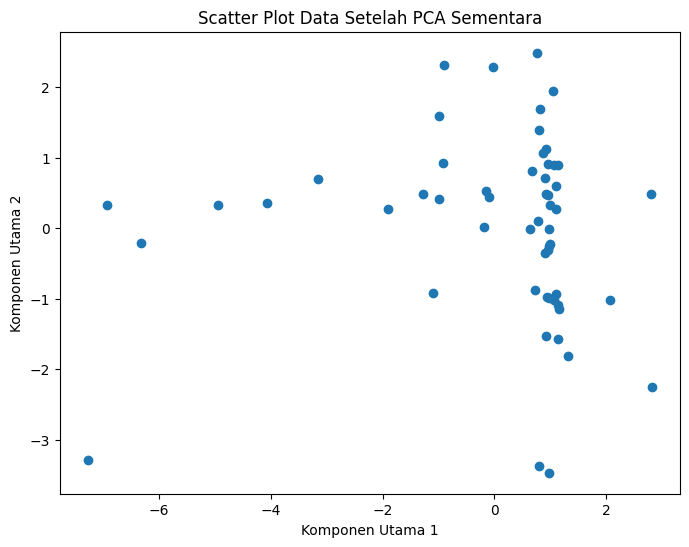

In [11]:
# prompt: visualisasi scatterplot variable x

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.title('Scatter Plot Data Setelah PCA Sementara')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()


# **GUNAKAN tSNE UNTUK REDUKSI DIMENSI**

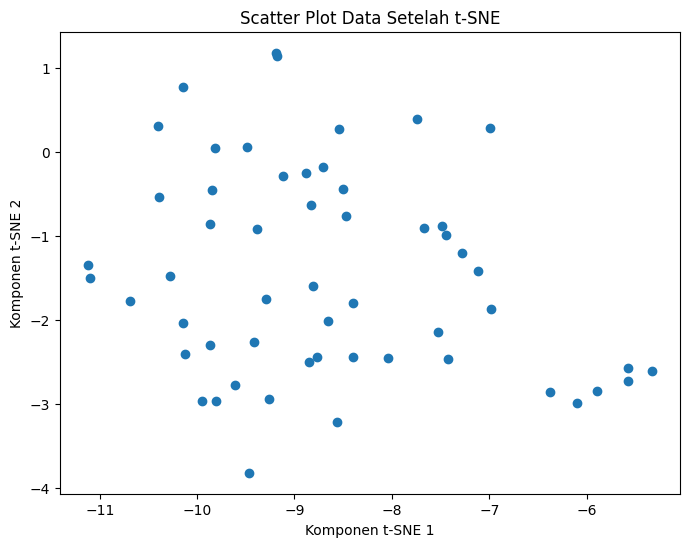

In [12]:
# prompt: gunakan tSNE untuk reduksi dimensi x

import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

# **GUNAKAN t-SNE UNTUK REDUKSI DIMENSI**
tsne = TSNE(n_components=2, random_state=42)  # Initialize t-SNE with 2 components
x_tsne = tsne.fit_transform(x)

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1])
plt.title('Scatter Plot Data Setelah t-SNE')
plt.xlabel('Komponen t-SNE 1')
plt.ylabel('Komponen t-SNE 2')
plt.show()

# **GUNAKAN LDA UNTUK REDUKSI DIMENSI**

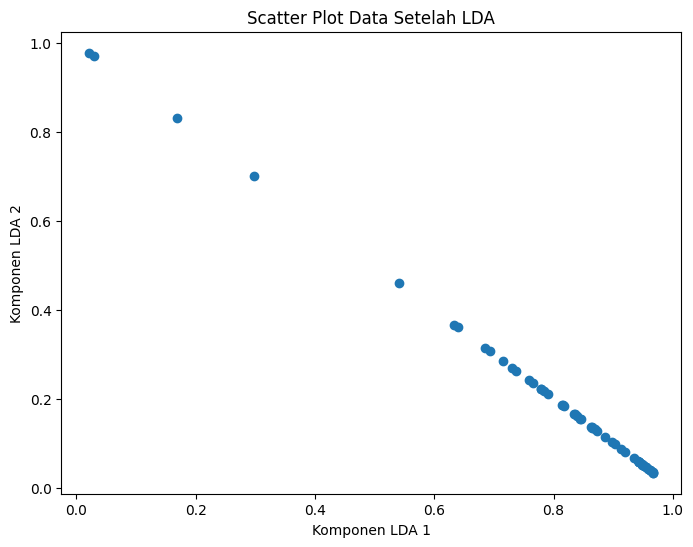

In [13]:
# prompt: gunakan LDA untuk reduksi dimensi x

from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'x' is already defined as in your provided code

# LDA for dimensionality reduction
lda = LatentDirichletAllocation(n_components=2, random_state=42) # You can adjust n_components
x_lda = lda.fit_transform(x)

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_lda[:, 0], x_lda[:, 1])
plt.title('Scatter Plot Data Setelah LDA')
plt.xlabel('Komponen LDA 1')
plt.ylabel('Komponen LDA 2')
plt.show()

# **GUNAKAN BASIC AE UNTUK REDUKSI DIMENSI**

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 479ms/step - loss: 10.3989 - val_loss: 9.4050
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.3896 - val_loss: 9.3958
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.3789 - val_loss: 9.3865
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 10.3659 - val_loss: 9.3771
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 10.3527 - val_loss: 9.3648
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 10.3381 - val_loss: 9.3501
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.3216 - val_loss: 9.3348
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.3041 - val_loss: 9.3193
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 10.2846 - val_loss: 9.3037
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 10.2630 - val_loss: 9.2879
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 10.2404 - val_loss: 9.2719
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 10.2155 - va

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


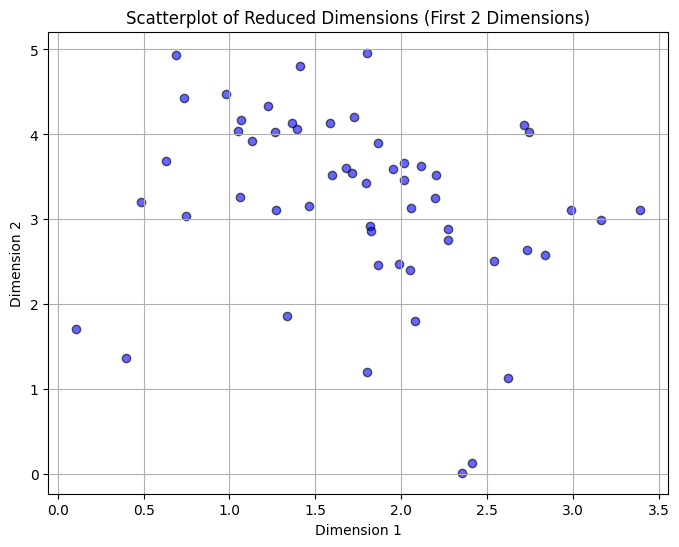

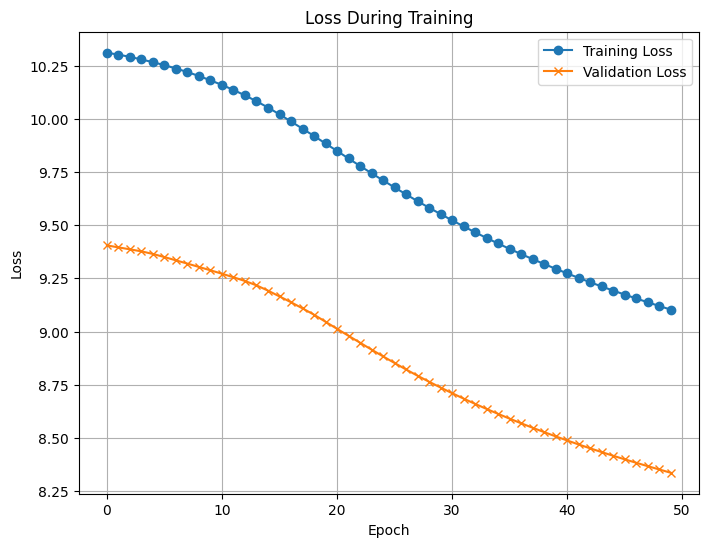

Dimensi data asli: (55, 12)
Dimensi data setelah reduksi: (55, 2)


In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Set seed untuk memastikan hasil tetap sama
np.random.seed(42)
tf.random.set_seed(42)

X = x

# Parameter
input_dim = X.shape[1]  # Jumlah fitur asli
encoding_dim = 2  # Dimensi yang direduksi

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = Model(input_layer, decoded)

# Encoder Model (untuk mendapatkan data yang direduksi)
encoder = Model(input_layer, encoded)

# Compile Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
history = autoencoder.fit(
    X, X,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)

# Gunakan encoder untuk mendapatkan representasi data dalam dimensi rendah
X_reduced = encoder.predict(X)

# Visualisasi scatterplot dari data berdimensi rendah (2D saja)
plt.figure(figsize=(8, 6))
if encoding_dim >= 2:
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='blue', alpha=0.6, edgecolor='k')
    plt.title("Scatterplot of Reduced Dimensions (First 2 Dimensions)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()
else:
    print("Dimensi reduksi kurang dari 2, tidak dapat membuat scatterplot.")

# Visualisasi grafik loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title("Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("Dimensi data asli:", X.shape)
print("Dimensi data setelah reduksi:", X_reduced.shape)


In [40]:
x = x_copies

# **GUNAKAN AE OPTIMIZED UNTUK REDUKSI DIMENSI**

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 10.3214 - val_loss: 9.4389
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.3097 - val_loss: 9.3956
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.2670 - val_loss: 9.3479
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.2257 - val_loss: 9.2935
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.1895 - val_loss: 9.2272
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.1518 - val_loss: 9.1480
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.1162 - val_loss: 9.0534
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.0387 - val_loss: 8.9449
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.9821 - val_loss: 8.8229
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.9420 - val_loss: 8.6934
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.8705 - val_loss: 8.5600
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.7355

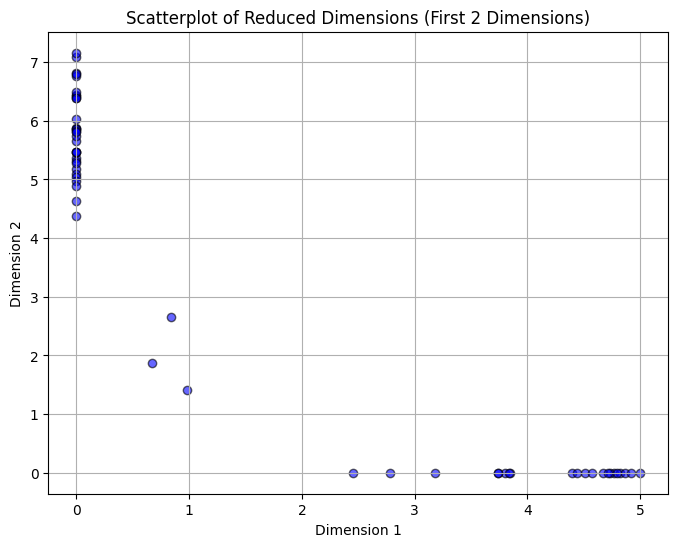

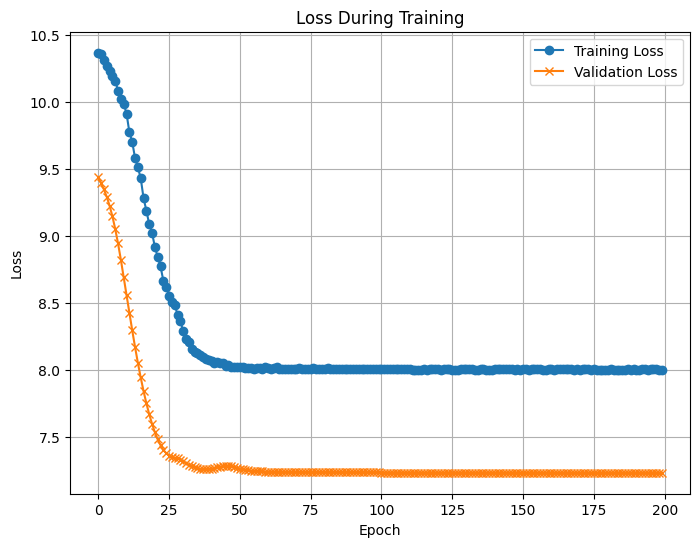

Dimensi data asli: (55, 12)
Dimensi data setelah reduksi: (55, 2)


In [41]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

# Memastikan hasil tetap sama setiap kali running
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
tf.random.set_seed(42)

# Data Input
X = x

# Parameter
input_dim = X.shape[1]  # Jumlah fitur asli
encoding_dim = 2  # Dimensi yang direduksi
hidden_dim_1 = 64  # Jumlah neuron pada hidden layer pertama
hidden_dim_2 = 32  # Jumlah neuron pada hidden layer kedua

# Encoder
input_layer = Input(shape=(input_dim,))
x = Dense(hidden_dim_1, activation='relu')(input_layer)  # Lapisan tersembunyi pertama
x = BatchNormalization()(x)  # Normalisasi batch
x = Dropout(0.2)(x)  # Dropout untuk mencegah overfitting
x = Dense(hidden_dim_2, activation='tanh')(x)  # Lapisan tersembunyi kedua
encoded = Dense(encoding_dim, activation='relu')(x)  # Lapisan encoding

# Decoder
x = Dense(hidden_dim_2, activation='tanh')(encoded)  # Lapisan tersembunyi pertama decoder
x = Dense(hidden_dim_1, activation='relu')(x)  # Lapisan tersembunyi kedua decoder
x = Dropout(0.2)(x)  # Dropout untuk mencegah overfitting
decoded = Dense(input_dim, activation='sigmoid')(x)  # Lapisan output

# Autoencoder Model
autoencoder = Model(input_layer, decoded)

# Encoder Model (untuk mendapatkan data yang direduksi)
encoder = Model(input_layer, encoded)  # Perbaikan di sini

# Compile Autoencoder
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Train Autoencoder
history = autoencoder.fit(
    X, X,
    epochs=200,  # Tambahkan jumlah epoch untuk pelatihan yang lebih panjang
    batch_size=32,
    shuffle=False,  # Tidak mengacak ulang data
    validation_split=0.2
)

# Gunakan encoder untuk mendapatkan representasi data dalam dimensi rendah
X_reduced = encoder.predict(X)

# Visualisasi scatterplot dari data berdimensi rendah (2D saja)
plt.figure(figsize=(8, 6))
if encoding_dim >= 2:
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='blue', alpha=0.6, edgecolor='k')
    plt.title("Scatterplot of Reduced Dimensions (First 2 Dimensions)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()
else:
    print("Dimensi reduksi kurang dari 2, tidak dapat membuat scatterplot.")

# Visualisasi grafik loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title("Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("Dimensi data asli:", X.shape)
print("Dimensi data setelah reduksi:", X_reduced.shape)


In [42]:
X_reduced

array([[0.       , 5.6584992],
       [0.       , 5.8797603],
       [4.514066 , 0.       ],
       [2.785284 , 0.       ],
       [0.8432088, 2.6618426],
       [4.7694764, 0.       ],
       [0.       , 5.3724866],
       [0.       , 5.172335 ],
       [4.668641 , 0.       ],
       [3.177133 , 0.       ],
       [0.       , 6.0356054],
       [0.       , 5.311263 ],
       [3.8047233, 0.       ],
       [4.728794 , 0.       ],
       [0.       , 5.090183 ],
       [3.7380786, 0.       ],
       [0.       , 5.4722056],
       [0.       , 5.279193 ],
       [4.997863 , 0.       ],
       [0.       , 6.4371457],
       [3.7410498, 0.       ],
       [0.       , 6.8212295],
       [0.       , 4.6341734],
       [0.       , 7.0892506],
       [0.       , 5.0406127],
       [2.457429 , 0.       ],
       [0.       , 5.4740148],
       [0.       , 6.768378 ],
       [0.       , 6.414025 ],
       [0.       , 4.9648695],
       [0.       , 6.3917108],
       [3.8462837, 0.       ],
       [

# **ELBOW-KMEANS**

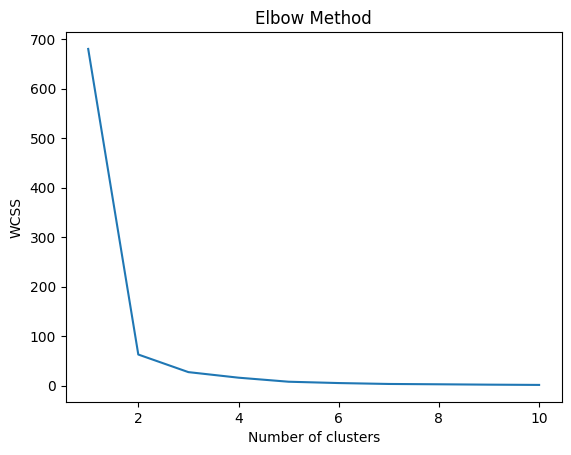

In [44]:
# prompt: hitung dengan elbow k optimal dari data x_pca

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Dari hasil Elbow menunjukkan K optimal = 2



Calculated centroids:
[[3.923248   0.14335847]
 [0.02635098 5.706671  ]]


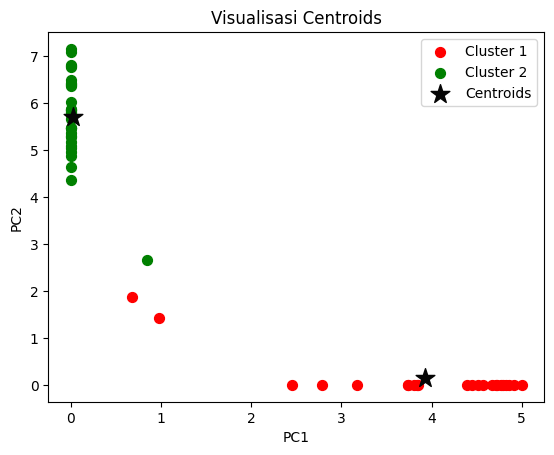

                           jurusan bekerja?              bidang?  \
0               teknik informatika       ya           pendidikan   
1               teknik informatika       ya           pendidikan   
2               teknik informatika       ya           pendidikan   
3               teknik informatika       ya  teknologi informasi   
4                 sistem informasi       ya           pendidikan   
5            pendidikan matematika       ya           pendidikan   
6               teknik informatika       ya  teknologi informasi   
7             teknologi informasi        ya  teknologi informasi   
8   pendidikan teknik informatika        ya               swasta   
9                 sistem informasi       ya  teknologi informasi   
10              teknik informatika       ya           pendidikan   
11              teknik informatika       ya           pendidikan   
12              teknik informatika       ya           pendidikan   
13       pendidikan bahasa inggris       ya     

In [45]:
# Define the number of clusters
num_clusters = 2

# Fit KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# Melakukan clustering dengan KMeans untuk k=3
dfpake['cluster'] = kmeans.fit_predict(X_reduced)
centroids = kmeans.cluster_centers_

# 2. Print the centroids
print("Calculated centroids:")
print(centroids)

# 3. Visualize the centroids on a plot
colors = ['r', 'g', 'b']
for i in range(kmeans.n_clusters):
    plt.scatter(X_reduced[kmeans.labels_ == i, 0], X_reduced[kmeans.labels_ == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505', label='Centroids')

plt.legend()
plt.title('Visualisasi Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Menghitung jarak Euclidean setiap titik ke setiap centroid
distances = np.zeros((X_reduced.shape[0], num_clusters))
for i in range(num_clusters):
    distances[:, i] = np.linalg.norm(X_reduced - centroids[i], axis=1)

# Menambahkan jarak ke dataframe
for i in range(num_clusters):
    dfpake[f'distance_to_centroid_{i+1}'] = distances[:, i]

# Menampilkan dataframe dengan jarak Euclidean
print(dfpake)

In [46]:
# prompt: hitung akurasi clustering dengan DBI dan Sillhoute

# Menghitung Davies-Bouldin Index (DBI)
dbi = davies_bouldin_score(X_reduced, kmeans.labels_)
print(f"Davies-Bouldin Index (DBI): {dbi}")

Davies-Bouldin Index (DBI): 0.237909478818752


Calculated centroids:
[[ 4.2181582e+00 -2.3841858e-07]
 [ 7.1525574e-07  5.8048916e+00]
 [ 8.3219814e-01  1.9863644e+00]]


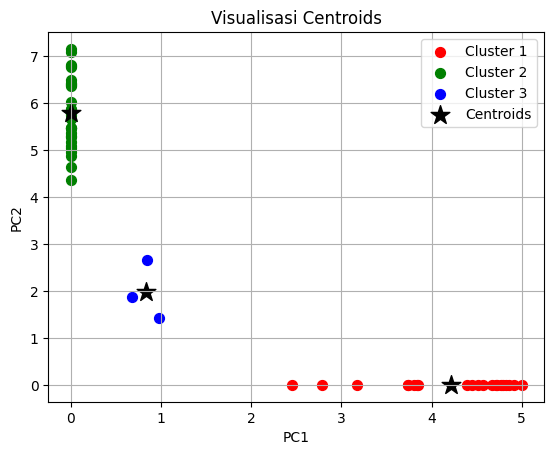

Dataframe dengan jarak ke centroid:
              jurusan bekerja?              bidang?                  posisi?  \
0  teknik informatika       ya           pendidikan                     staf   
1  teknik informatika       ya           pendidikan                 pendidik   
2  teknik informatika       ya           pendidikan  direktur/kepala/manager   
3  teknik informatika       ya  teknologi informasi                     staf   
4    sistem informasi       ya           pendidikan                     staf   

   lama bekerja?  pengalaman ketrampilan kerja?  pemrograman?  \
0              5                              3             4   
1              2                              4             4   
2              3                              4             2   
3              8                              5             1   
4              5                              4             4   

   matematis statistik?  tata kelola SI/TI? technopreneurship?  ...  \
0                    

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the number of clusters
num_clusters = 3  # Ubah jumlah klaster menjadi 3

# Fit KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dfpake['cluster'] = kmeans.fit_predict(X_reduced)  # Menambahkan kolom 'cluster' ke dataframe
centroids = kmeans.cluster_centers_  # Mendapatkan koordinat centroid

# 2. Print the centroids
print("Calculated centroids:")
print(centroids)

# 3. Visualize the centroids on a plot
colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Tambahkan warna jika klaster > 3
for i in range(kmeans.n_clusters):
    plt.scatter(
        X_reduced[kmeans.labels_ == i, 0],
        X_reduced[kmeans.labels_ == i, 1],
        s=50,
        c=colors[i],
        label=f'Cluster {i+1}'
    )
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='*',
    s=200,
    c='k',
    label='Centroids'
)

plt.legend()
plt.title('Visualisasi Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# 4. Menghitung jarak Euclidean setiap titik ke setiap centroid
distances = np.zeros((X_reduced.shape[0], num_clusters))  # Array jarak ke tiap centroid
for i in range(num_clusters):
    distances[:, i] = np.linalg.norm(X_reduced - centroids[i], axis=1)

# 5. Menambahkan jarak ke dataframe
for i in range(num_clusters):
    dfpake[f'distance_to_centroid_{i+1}'] = distances[:, i]

# Menampilkan dataframe dengan jarak Euclidean
print("Dataframe dengan jarak ke centroid:")
print(dfpake.head())


In [49]:
# prompt: hitung akurasi clustering dengan DBI dan Sillhoute

# Menghitung Davies-Bouldin Index (DBI)
dbi = davies_bouldin_score(X_reduced, kmeans.labels_)
print(f"Davies-Bouldin Index (DBI): {dbi}")

Davies-Bouldin Index (DBI): 0.2765920869522604


In [51]:
# Add cluster labels to the original dataframe (df)
df['cluster'] = kmeans.labels_

# Now 'df' contains the cluster assignments
print(df.head())

              jurusan bekerja?              bidang?                  posisi?  \
0  teknik informatika       ya           pendidikan                     staf   
1  teknik informatika       ya           pendidikan                 pendidik   
2  teknik informatika       ya           pendidikan  direktur/kepala/manager   
3  teknik informatika       ya  teknologi informasi                     staf   
4    sistem informasi       ya           pendidikan                     staf   

   lama bekerja?  pengalaman ketrampilan kerja?  pemrograman?  \
0              5                              3             4   
1              2                              4             4   
2              3                              4             2   
3              8                              5             1   
4              5                              4             4   

   matematis statistik?  tata kelola SI/TI? technopreneurship?  multimedia?  \
0                     3                   4      

In [52]:
df

,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,technopreneurship?,multimedia?,seni dalam multimedia?,tujuan karir?,analitis sistematis?,memimpin?,berpikir kreatif?,kategori lama bekerja,cluster
0,teknik informatika,ya,pendidikan,staf,5,3,4,3,4,tidak,3,3,swasta,3,3,3,5-10,1
1,teknik informatika,ya,pendidikan,pendidik,2,4,4,4,4,tidak,4,4,dosen,4,3,4,2-5,1
2,teknik informatika,ya,pendidikan,direktur/kepala/manager,3,4,2,4,3,tidak,3,2,dosen,4,4,4,2-5,0
3,teknik informatika,ya,teknologi informasi,staf,8,5,1,1,2,ya,5,5,swasta,4,3,5,5-10,0
4,sistem informasi,ya,pendidikan,staf,5,4,4,4,4,ya,4,4,dosen,4,3,4,5-10,2
5,pendidikan matematika,ya,pendidikan,pendidik,4,4,3,3,3,ya,2,2,dosen,3,3,3,2-5,0
6,teknik informatika,ya,teknologi informasi,direktur/kepala/manager,5,4,4,4,3,tidak,2,2,dosen,4,2,4,5-10,1
7,teknologi informasi,ya,teknologi informasi,staf,15,5,3,3,2,tidak,1,1,swasta,5,4,4,>15,1
8,pendidikan teknik informatika,ya,swasta,staf,5,4,4,4,4,tidak,4,4,swasta,4,4,4,5-10,0
9,sistem informasi,ya,teknologi informasi,staf,2,3,3,3,3,tidak,3,3,dosen,4,4,4,2-5,0


In [53]:
# prompt: download df sebagai excel

# Assuming 'df' is your DataFrame with the 'cluster' column
# ... (your existing code) ...

# Download the DataFrame as an Excel file
df.to_excel('clustered_data.xlsx', index=False)  # Set index=False to avoid saving row indices

# Optionally, download the file to your local machine using files.download() if running in Google Colab
from google.colab import files
files.download('clustered_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>